# Exploratory Data Analysis

Inspiration :
- https://www.kaggle.com/artgor/eda-and-models

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gc

from src.utils import printmd
from src.dataset.utils import df_empty
from src.dataset.data import Dataset
from src.features.utils import *
from src.features.build_features import *
from src.visualization.visualize import *
from src.visualization.utils import *

import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("deep")

import warnings
warnings.filterwarnings("ignore")

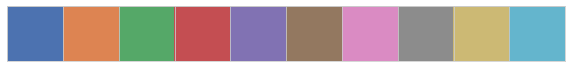

In [3]:
sns.palplot(sns.color_palette())

In [4]:
ds = Dataset()
ds.load_dataset()
#build_processed_dataset(ds)

In [5]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['isFraud'] = y

In [6]:
pd.melt(X, id_vars=['isFraud'], value_vars=['id_10'])[100:105]

,label,variable,value
100,0,id_10,NaN
101,0,id_10,0.0
102,0,id_10,NaN
103,0,id_10,NaN
104,0,id_10,0.0


## Identity information

In [7]:
grid_distplot(X, [f"id_{i:02}" for i in range(1, 12)]).fig.savefig(f"../../reports/figures/identity_distplot.png", dpi=96*2)
plt.close()

In [8]:
grid_violin_dataset(X, X_test, [f"id_{i:02}" for i in range(1,12)]).fig.savefig(f"../../reports/figures/identity_violin_dataset.png", dpi=96*2)
plt.close()

In [9]:
grid_violin_fraud(X, [f"id_{i:02}" for i in range(1,12)]).fig.savefig(f"../../reports/figures/identity_violin_fraud.png", dpi=96*2)
plt.close()

In [10]:
save_pairplots(X.fillna(-1), [f"id_{i:02}" for i in range(1, 12)], f"../../reports/figures/", True)
gc.collect()

0

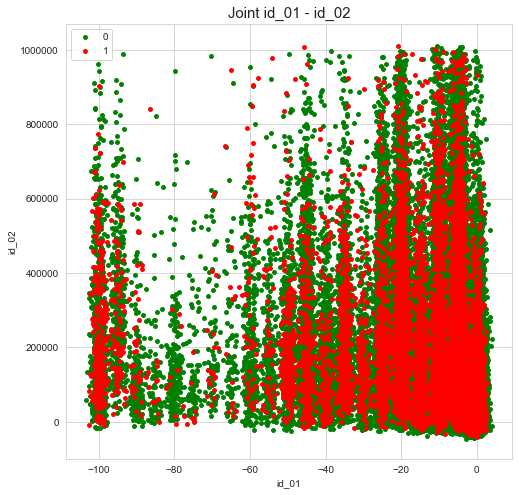

In [8]:
plot_joint(X.fillna(-1), "id_01", "id_02", True)
plt.show()

#### id_12 --> id_38 + DeviceType and DeviceInfo : all categorical

Limit plots to 4 to 8 levels

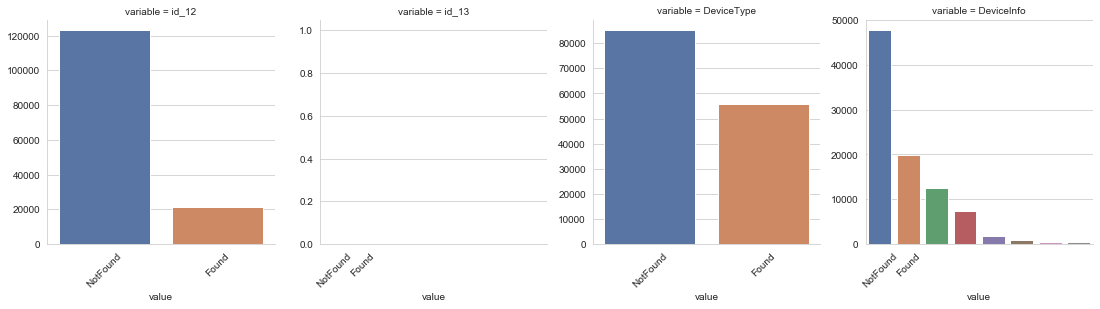

In [11]:
grid_countplot(X, [f"id_{i:02}" for i in range(12, 14)] + ['DeviceType', 'DeviceInfo'], 8)

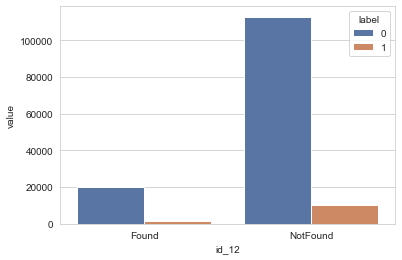

In [12]:
grouped_countplot_fraud(X, 'id_12')

## Transaction Data

#### TransactionDT

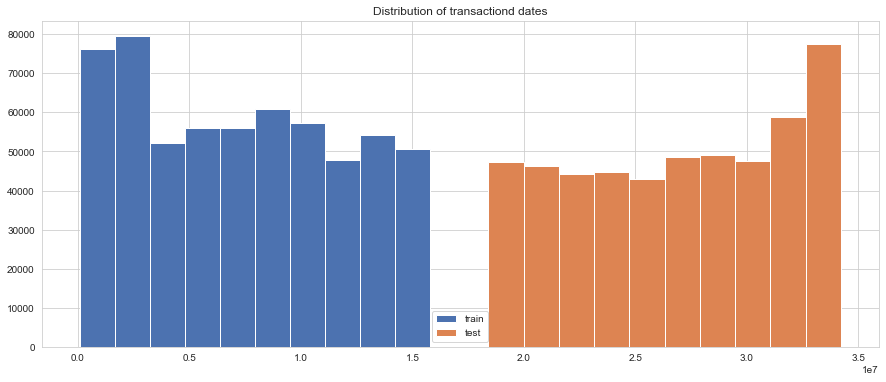

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(ds.X_train['TransactionDT'], label='train');
ax.hist(ds.X_test['TransactionDT'], label='test');
ax.legend();
ax.set_title('Distribution of transactiond dates');
fig.show()

#### TransactionAmt

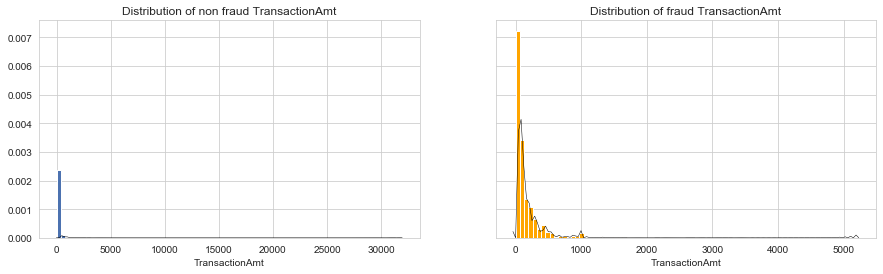

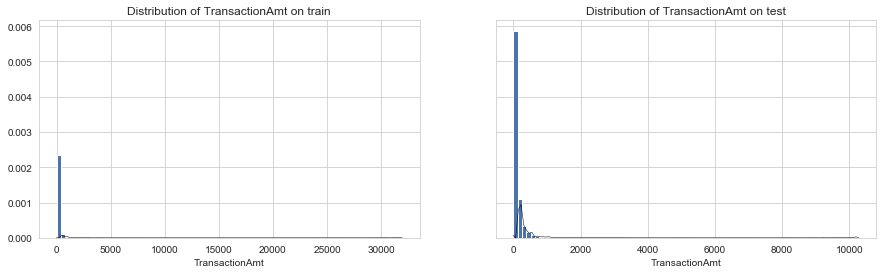

In [14]:
hist_isfraud(X, 'TransactionAmt', 80)
hist_train_test(X, X_test, 'TransactionAmt', 80)

#### ProductCD

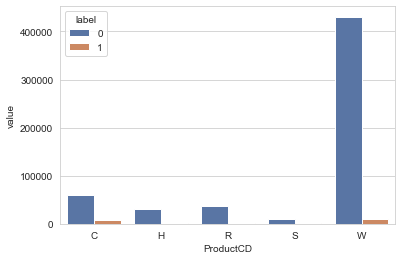

In [15]:
grouped_countplot_fraud(X, 'ProductCD')

#### card1 -> 6

In [16]:
for i in range(1, 7):
    col = f"card{i}"
    print(f"card{i} has {X[col].nunique()} categories")

card1 has 13553 categories
card2 has 500 categories
card3 has 114 categories
card4 has 4 categories
card5 has 119 categories
card6 has 4 categories


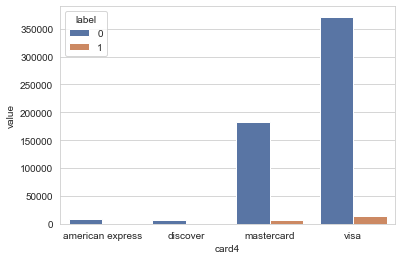

In [17]:
grouped_countplot_fraud(X, 'card4')

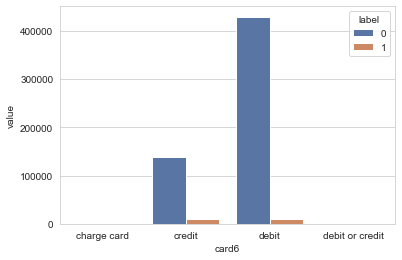

In [18]:
grouped_countplot_fraud(X, 'card6')

#### addr1 & 2

In [19]:
X["addr2"].nunique()

74

#### dist1 & 2

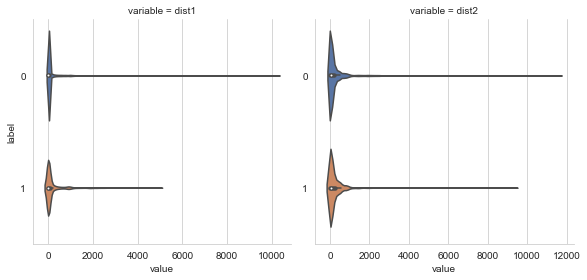

In [20]:
grid_violin_fraud(X, ['dist1', 'dist2'])

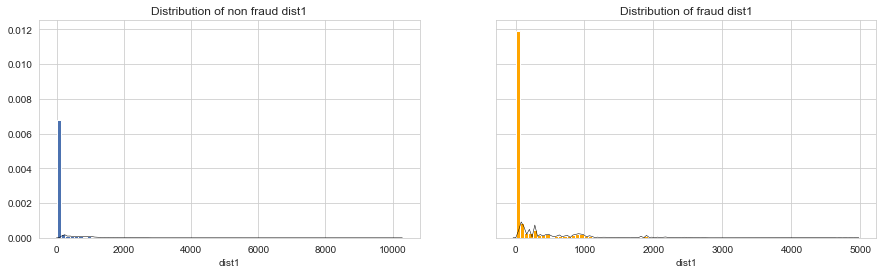

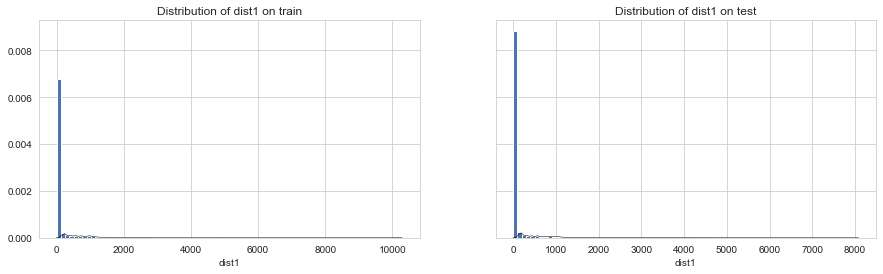

In [21]:
hist_isfraud(X, 'dist1', 80)
hist_train_test(X, X_test, 'dist1', 80)

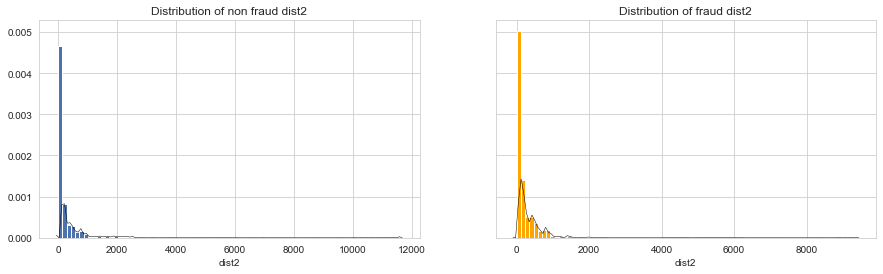

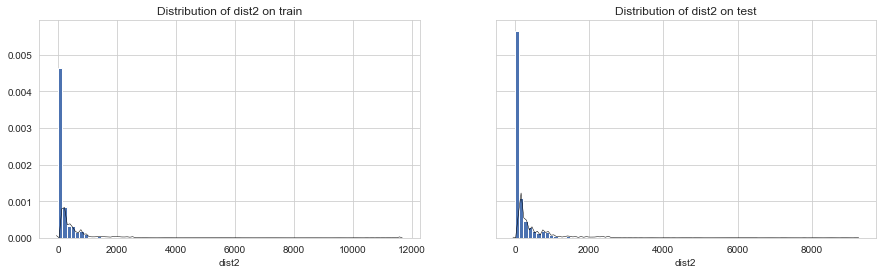

In [22]:
hist_isfraud(X, 'dist2', 80)
hist_train_test(X, X_test, 'dist2', 80)

#### M1 -> M9

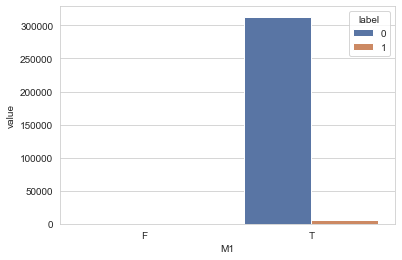

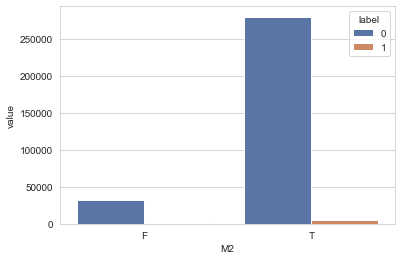

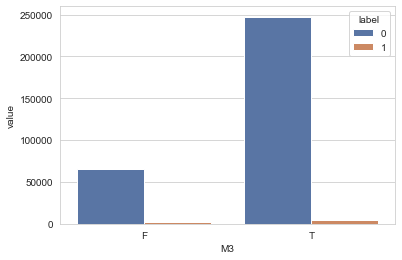

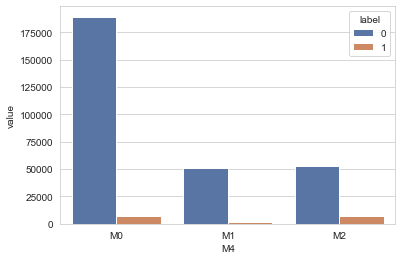

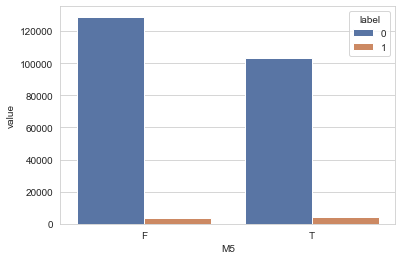

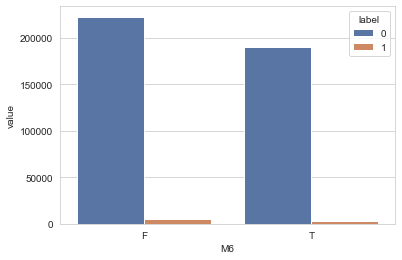

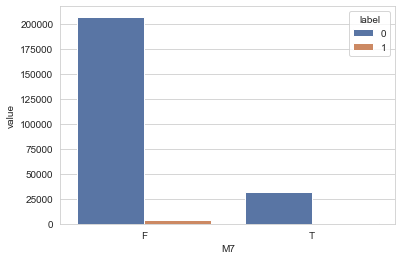

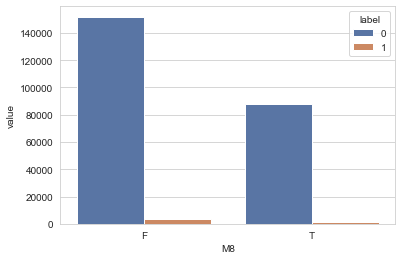

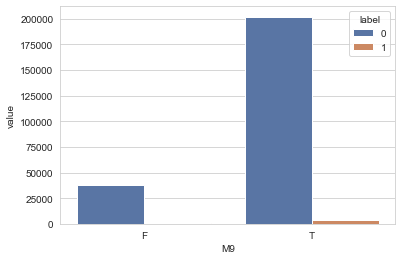

In [31]:
for i in range(1, 10):
    fig, ax = plt.subplots()
    grouped_countplot_fraud(X, f'M{i}')

#### C1 --> C14

In [12]:
grid_distplot(X, [f'C{i}' for i in range(1, 15)]).fig.savefig(f"../../reports/figures/C_displot.png", dpi=96*2)
plt.close()

In [13]:
grid_violin_dataset(X, X_test, [f'C{i}' for i in range(1, 15)]).fig.savefig(f"../../reports/figures/C_violin_dataset.png", dpi=96*2)
plt.close()

In [14]:
grid_violin_fraud(X, [f'C{i}' for i in range(1, 15)]).fig.savefig(f"../../reports/figures/C_violin_fraud.png", dpi=96*2)
plt.close()

In [6]:
save_pairplots(X, [f'C{i}' for i in range(1, 15)], f"../../reports/figures/", True)
gc.collect()

0

#### D1 --> D15

In [16]:
grid_distplot(X.fillna(-1), [f'D{i}' for i in range(1, 16)]).fig.savefig(f"../../reports/figures/D_displot.png", dpi=96*2)
plt.close()

In [17]:
grid_violin_dataset(X.fillna(-1), X_test.fillna(-1), [f'D{i}' for i in range(1, 16)]).fig.savefig(f"../../reports/figures/D_violin_dataset.png", dpi=96*2)
plt.close()

In [18]:
grid_violin_fraud(X.fillna(-1), [f'D{i}' for i in range(1, 16)]).fig.savefig(f"../../reports/figures/D_violin_fraud.png", dpi=96*2)
plt.close()

In [7]:
save_pairplots(X.fillna(-1), [f'D{i}' for i in range(1, 16)], f"../../reports/figures/", True)
gc.collect()

0

#### Let's try and take log / boxcox


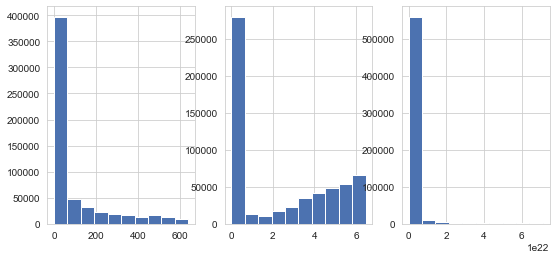

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4))
ax1.hist(X['D1'])
ax2.hist(np.log(1 + X['D1']))
ax3.hist(stats.boxcox(1+X['D1'])[0])
plt.show()

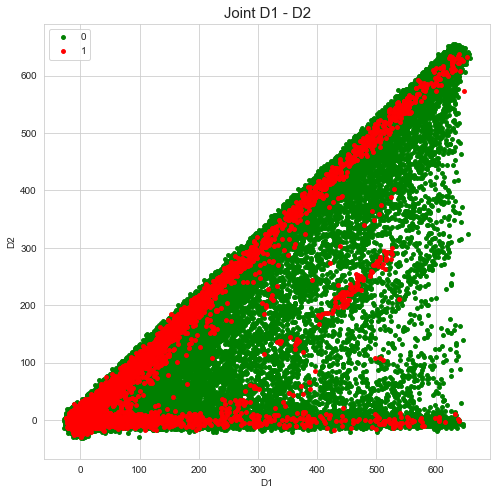

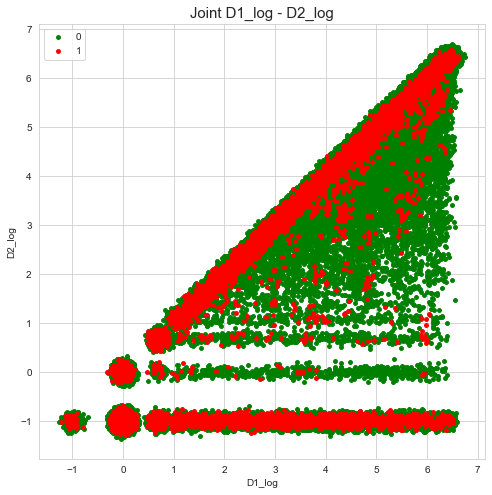

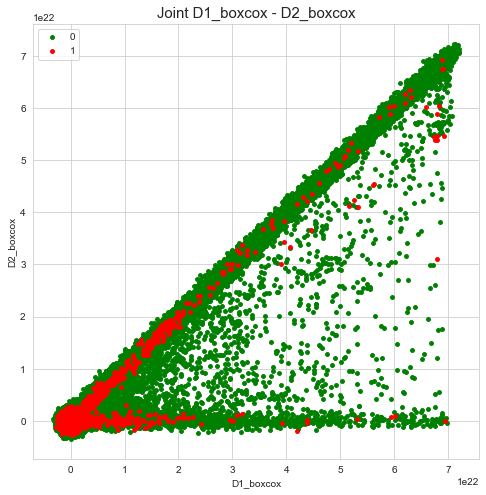

In [60]:
X['D1_log'] = np.log1p(X['D1'])
X['D2_log'] = np.log1p(X['D2'])
X['D1_boxcox'] = stats.boxcox(1+X['D1'])[0]
X['D2_boxcox'] = stats.boxcox(1+X['D2'])[0]
plot_joint(X.fillna(-1), "D1", "D2", True)
plot_joint(X.fillna(-1), "D1_log", "D2_log", True)
plot_joint(X.fillna(-1), "D1_boxcox", "D2_boxcox", True)
plt.show()

#### Vesta features V1 --> V339

From https://www.kaggle.com/c/ieee-fraud-detection/discussion/106540612828 code to gather these V variables into 15 groups so that each group has the same number of missing value.

In [6]:
def find_Vgroups(X, V_variables):
    na_value = X[V_variables].isnull().sum()
    na_list = na_value.unique()
    na_value = na_value.to_dict()
    cols_same_null = []
    for i in range(len(na_list)):
        cols_same_null.append([k for k,v in na_value.items() if v == na_list[i]])
    return cols_same_null
    
V_groups = find_Vgroups(X, [i for i in list(X) if 'V' in i])

In [7]:
for ind, c in enumerate(V_groups):
    print(f"Number elements in {ind} is {len(c)}")

Number elements in 0 is 11
Number elements in 1 is 23
Number elements in 2 is 18
Number elements in 3 is 22
Number elements in 4 is 20
Number elements in 5 is 43
Number elements in 6 is 18
Number elements in 7 is 11
Number elements in 8 is 31
Number elements in 9 is 19
Number elements in 10 is 46
Number elements in 11 is 16
Number elements in 12 is 32
Number elements in 13 is 11
Number elements in 14 is 18


In [13]:
for i in range(11, 15):
    grid_distplot(X, V_groups[i]).fig.savefig(f"../../reports/figures/Vgroup{i}_distplot.png", dpi=96*2)
    plt.close()
    gc.collect()
    grid_violin_dataset(X, X_test, V_groups[i]).fig.savefig(f"../../reports/figures/Vgroup{i}_violin_dataset.png", dpi=96*2)
    plt.close()
    gc.collect()
    grid_violin_fraud(X, V_groups[i]).fig.savefig(f"../../reports/figures/Vgroup{i}_violin_fraud.png", dpi=96*2)
    plt.close()
    gc.collect()
    save_pairplots(X.fillna(-1), V_groups[i], f"../../reports/figures/", jitter=True)
    gc.collect()

In [12]:
plot_joint(X.fillna(-1), "V242", "V243", jitter=True)
plt.close()